In [ ]:
!pip install easyocr
!pip install imutils

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

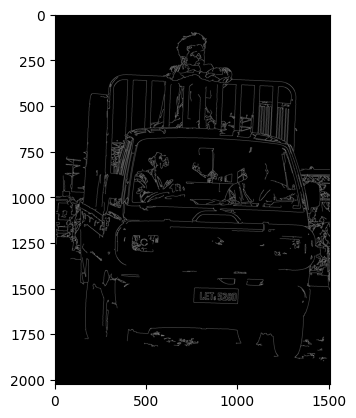

In [5]:
img = cv2.imread('/content/1.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 10, 100) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[ 763, 1499]],

       [[ 760, 1578]],

       [[ 999, 1583]],

       [[1001, 1504]]], dtype=int32)

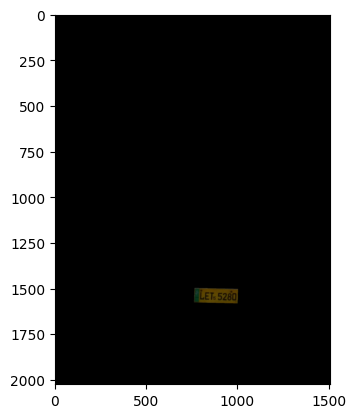

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

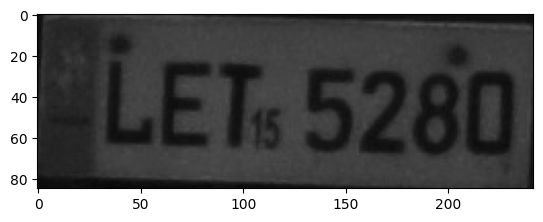

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

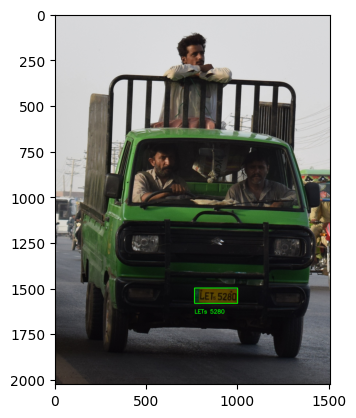

In [10]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" ,"numberplate", "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
bboxes,labels,score = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [ ]:
num = torch.argwhere(score>0.8).shape[0]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
igg = cv2.imread("/content/2.JPG")
for i in range(num):
  x1,y1,x2,y2 = bboxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
  igg = cv2.putText(igg,class_name,(x1,y1-10),font,0.5,(255,0,0),1,cv2.LINE_AA)

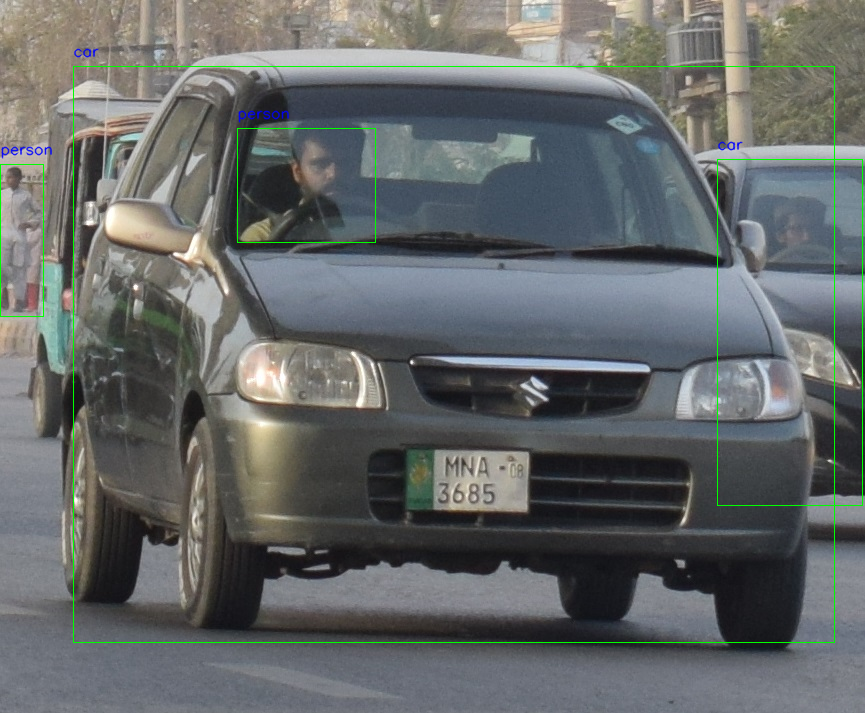

In [ ]:
cv2_imshow(igg)

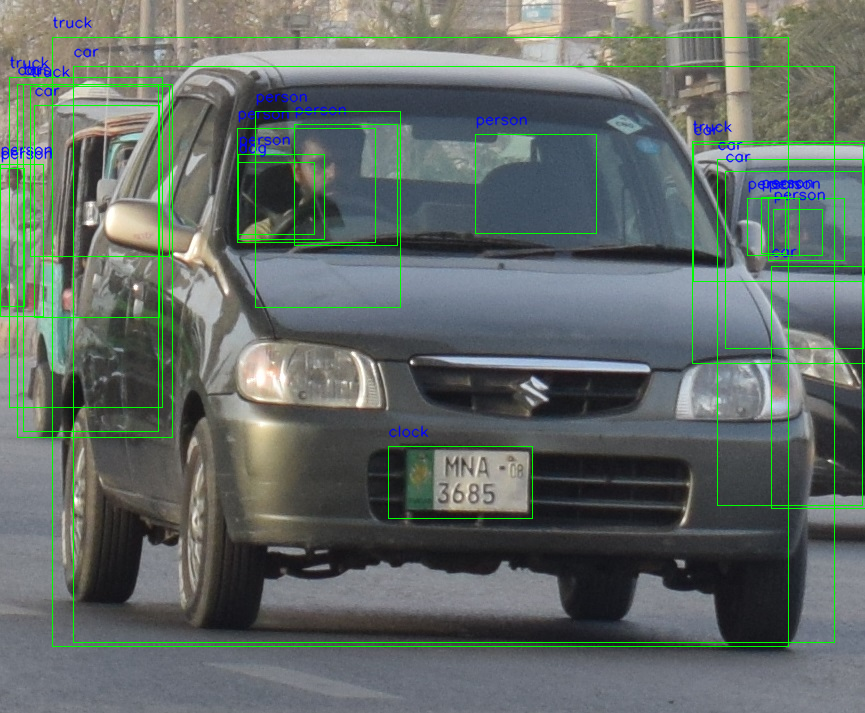

In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained model and set it to evaluation mode
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the COCO class names and add "license plate" to the list
coco_names = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat",
             "traffic light", "fire hydrant", "street sign", "stop sign", "parking meter", "bench",
             "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
             "hat", "backpack", "umbrella", "shoe", "eye glasses", "handbag", "tie", "suitcase",
             "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
             "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "plate",
             "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich",
             "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
             "potted plant", "bed", "mirror", "dining table", "window", "desk", "toilet", "door",
             "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven",
             "toaster", "sink", "refrigerator", "blender", "numberplate", "clock", "vase", "scissors",
             "teddy bear", "hair drier", "toothbrush", "hair brush"]

# Load the image
img_path = "/content/2.JPG"
img = Image.open(img_path)

# Transform the image to a tensor
transform = T.ToTensor()
img_tensor = transform(img)

# Run the model on the image
with torch.no_grad():
    pred = model([img_tensor])

# Get the bounding boxes, labels, and scores
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

# Define the font for displaying the class names
font = cv2.FONT_HERSHEY_SIMPLEX

# Load the original image using OpenCV for visualization
img_cv2 = cv2.imread(img_path)

# Loop through the detected objects and draw bounding boxes
for i in range(len(bboxes)):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    class_name = coco_names[labels[i] - 1]

    # Check if the detected object is a license plate based on its class name
    if class_name == "numberplate":
        img_cv2 = cv2.rectangle(img_cv2, (x1, y1), (x2, y2), (0, 0, 255), 2)
        img_cv2 = cv2.putText(img_cv2, class_name, (x1, y1 - 10), font, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
    else:
        img_cv2 = cv2.rectangle(img_cv2, (x1, y1), (x2, y2), (0, 255, 0), 1)
        img_cv2 = cv2.putText(img_cv2, class_name, (x1, y1 - 10), font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

# Display the annotated image
cv2_imshow(img_cv2)


error: ignored

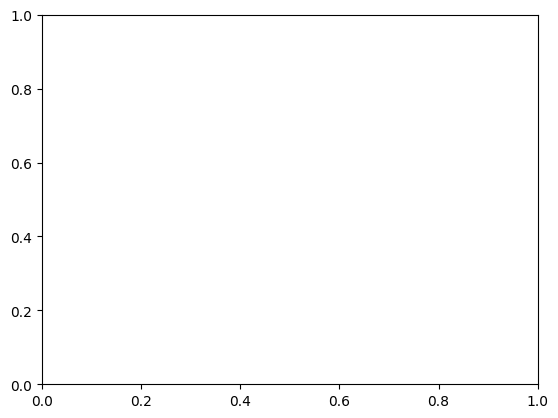

In [ ]:
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']

# Draw the bounding boxes with a confidence threshold
conf_threshold = 0.6  # Adjust this threshold as needed
for box, score in zip(boxes, scores):
    if score > conf_threshold:
        # Convert bounding box coordinates to integers and draw the rectangle
        box = [int(coord) for coord in box]
        rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.show()